<a href="https://colab.research.google.com/github/swapnalisingh13/Advance-ML/blob/main/2348565_Lab7_Adv_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [6]:
df.shape

(2111, 17)

In [7]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [9]:
num_columns = []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        num_columns.append(col)
df_1=df[num_columns]
df_1

Age    Height      Weight  FCVC  NCP      CH2O       FAF       TUE
0     21.000000  1.620000   64.000000   2.0  3.0  2.000000  0.000000  1.000000
1     21.000000  1.520000   56.000000   3.0  3.0  3.000000  3.000000  0.000000
2     23.000000  1.800000   77.000000   2.0  3.0  2.000000  2.000000  1.000000
3     27.000000  1.800000   87.000000   3.0  3.0  2.000000  2.000000  0.000000
4     22.000000  1.780000   89.800000   2.0  1.0  2.000000  0.000000  0.000000
...         ...       ...         ...   ...  ...       ...       ...       ...
2106  20.976842  1.710730  131.408528   3.0  3.0  1.728139  1.676269  0.906247
2107  21.982942  1.748584  133.742943   3.0  3.0  2.005130  1.341390  0.599270
2108  22.524036  1.752206  133.689352   3.0  3.0  2.054193  1.414209  0.646288
2109  24.361936  1.739450  133.346641   3.0  3.0  2.852339  1.139107  0.586035
2110  23.664709  1.738836  133.472641   3.0  3.0  2.863513  1.026452  0.714137

[2111 rows x 8 columns]

Scaling

In [10]:
scaler = StandardScaler()
df1 = scaler.fit_transform(df_1)

K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

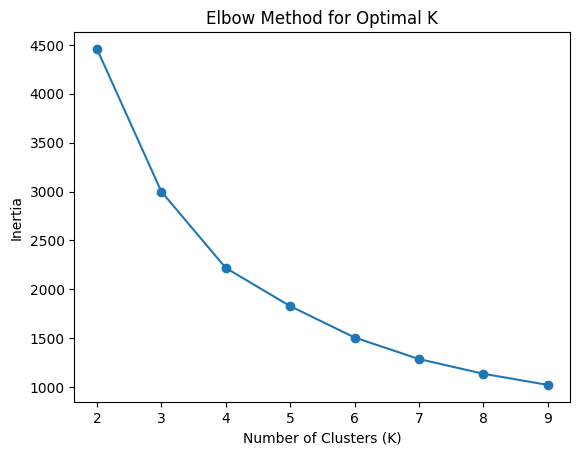

In [11]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df1)
k_values = [2, 3, 4, 5, 6,7,8,9]
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

The optimal K-value found is 4.
Its an optimal value so we can apply K-Means clustering with this K value to any subset of columns for visualization.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

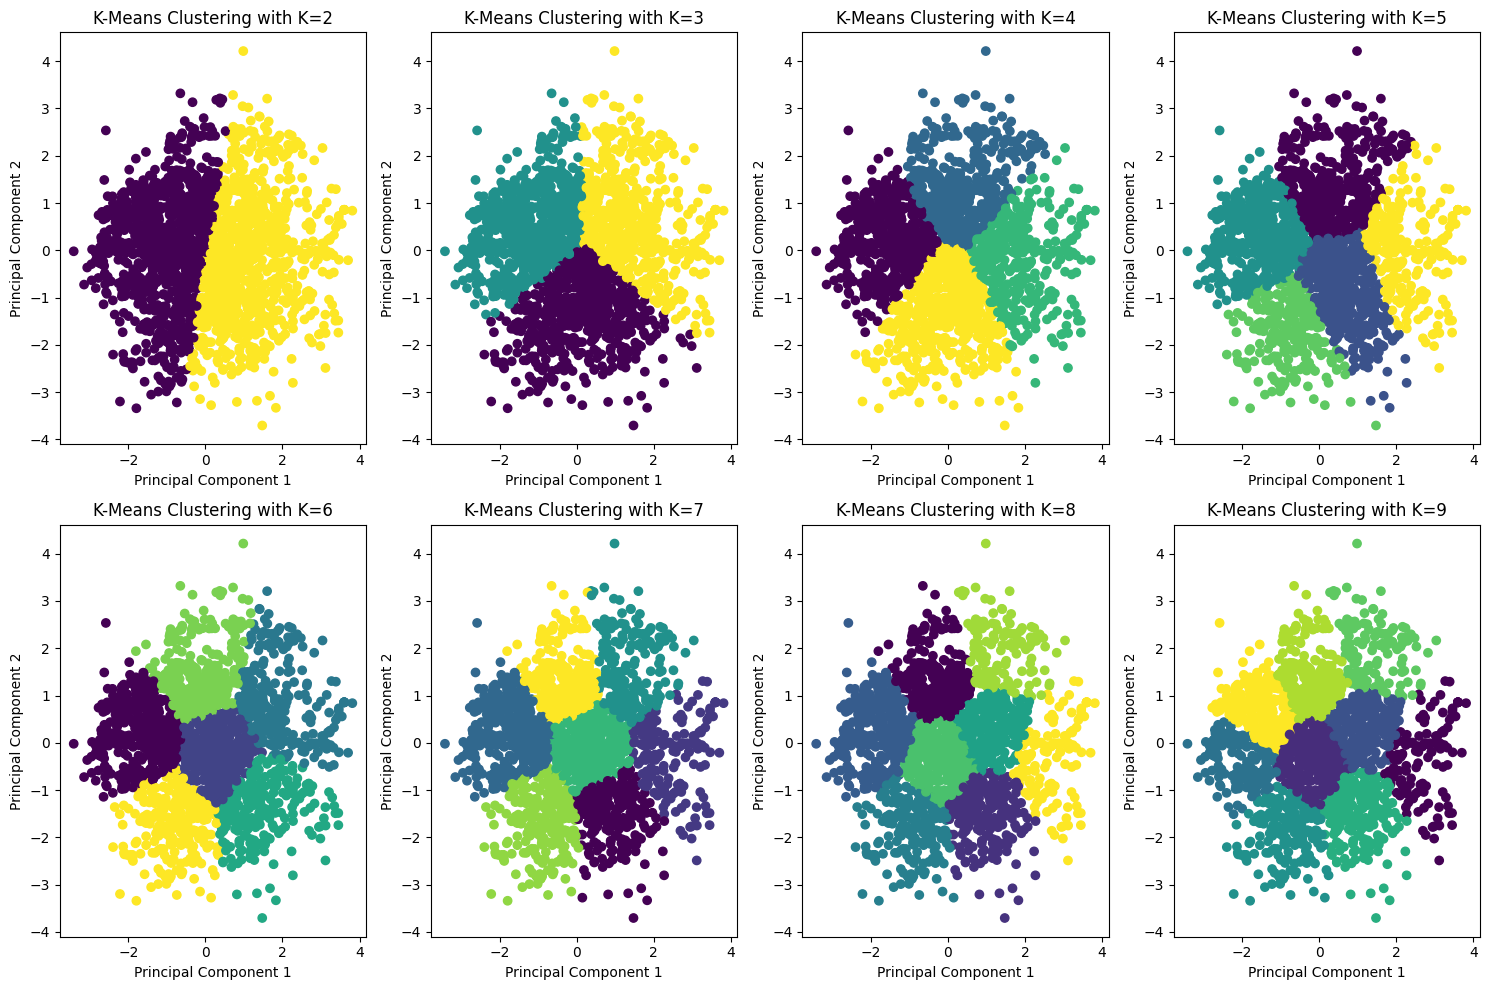

In [12]:
k_values = [2, 3, 4, 5, 6, 7,8,9]
num_cols = 4
num_rows = (len(k_values) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, k in enumerate(k_values):
    ax = axes[i // num_cols, i % num_cols] if num_rows > 1 else axes[i % num_cols]

    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_data)

    ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
    ax.set_title(f'K-Means Clustering with K={k}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


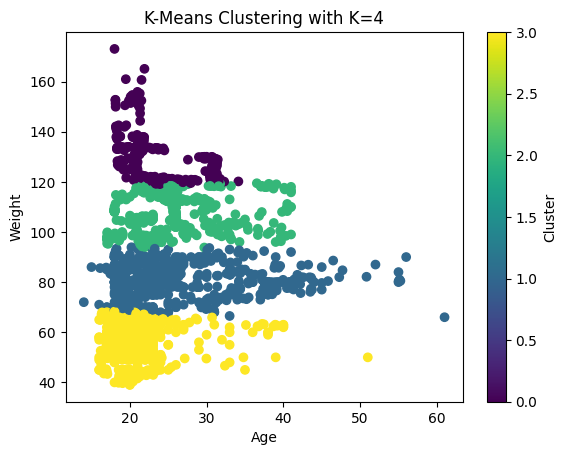

In [13]:
col1 = 'Age'
col2 = 'Weight'

df_2 = df[[col1, col2]]
new_k = 4
kmeans1 = KMeans(n_clusters=new_k, random_state=42)
labels = kmeans1.fit_predict(df_2)

plt.scatter(df_2[col1], df_2[col2], c=labels, cmap='viridis')
plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f'K-Means Clustering with K=4')
plt.colorbar(label='Cluster')
plt.show()
